   customer_id  credit_lines_outstanding  loan_amt_outstanding  \
0      8153374                         0           5221.545193   
1      7442532                         5           1958.928726   
2      2256073                         0           3363.009259   
3      4885975                         0           4766.648001   
4      4700614                         1           1345.827718   

   total_debt_outstanding       income  years_employed  fico_score  default  
0             3915.471226  78039.38546               5         605        0  
1             8228.752520  26648.43525               2         572        1  
2             2027.830850  65866.71246               4         602        0  
3             2501.730397  74356.88347               5         612        0  
4             1768.826187  23448.32631               6         631        0  


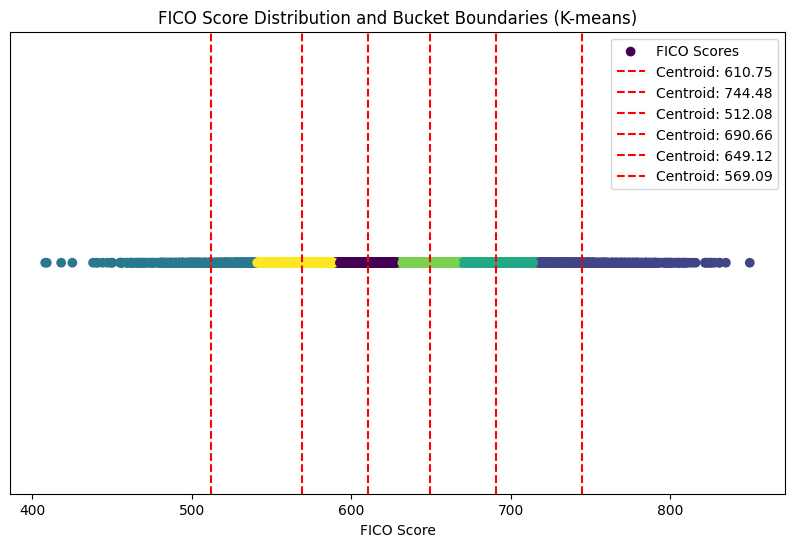

      fico_score  fico_bucket fico_rating
0            605            0   Excellent
1            572            5    Critical
2            602            0   Excellent
3            612            0   Excellent
4            631            4   Very Poor
...          ...          ...         ...
9995         697            3        Poor
9996         615            0   Excellent
9997         596            0   Excellent
9998         647            4   Very Poor
9999         757            1        Good

[10000 rows x 3 columns]


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the CSV file (update the path as needed)
csv_path = "Downloads/Task 3 and 4_Loan_Data.csv"  # Update this path to the actual file location
df = pd.read_csv(csv_path)

# Inspect the data to ensure 'fico_score' is present
print(df.head())

# Number of buckets (can be adjusted as needed)
num_buckets = 6

# Apply K-means clustering to FICO scores to create buckets
kmeans = KMeans(n_clusters=num_buckets)
df['fico_bucket'] = kmeans.fit_predict(df['fico_score'].values.reshape(-1, 1))

# Get the centroids (bucket boundaries)
centroids = kmeans.cluster_centers_

# Plotting the FICO scores and bucket boundaries
plt.figure(figsize=(10, 6))

# Scatter plot of FICO scores, colored by their bucket
plt.scatter(df['fico_score'], np.zeros_like(df['fico_score']), c=df['fico_bucket'], cmap='viridis', label='FICO Scores')

# Plot the bucket boundaries (centroids)
for centroid in centroids:
    plt.axvline(x=centroid, color='red', linestyle='--', label=f'Centroid: {centroid[0]:.2f}')

# Adding labels and title
plt.title("FICO Score Distribution and Bucket Boundaries (K-means)")
plt.xlabel("FICO Score")
plt.yticks([])
plt.legend()
plt.show()

# Assign ratings based on bucket indices
rating_map = {0: 'Excellent', 1: 'Good', 2: 'Fair', 3: 'Poor', 4: 'Very Poor', 5: 'Critical'}
df['fico_rating'] = df['fico_bucket'].map(rating_map)

# Display the data with the bucket and rating information
print(df[['fico_score', 'fico_bucket', 'fico_rating']])
